# TP de Machine Learning : Classification de Fruits avec K-Means

## Chargement des images et prétraitement

Je créé une fonction `take` pour prendre aléatoirement un certain nombre d'images. J'en profite pour redimensionner en 100x100.

In [28]:
from PIL import Image
from os import listdir
from os.path import isfile, join
from random import choices
import matplotlib.pyplot as plt

DATASET_DIR = "./fruits"

def take(nb_images: int): 
    files = [join(DATASET_DIR,f) for f in listdir(DATASET_DIR) if isfile(join(DATASET_DIR, f))]
    return [Image
            .open(f)
            .convert("RGB")
            .resize((100,100))
            for f in choices(files, k=nb_images)]


Ainsi qu'une fonction pour afficher un ensemble d'image en ligne.

In [77]:
import numpy as np
def display_row(*imgs):
    _, ax = plt.subplots(1, len(imgs), figsize=(20, 20))
    if not isinstance(ax, np.ndarray):
        ax = np.array([ax])
    for i, img in enumerate(imgs):
        ax[i].imshow(img)
        ax[i].axis('off')

Exemple : 

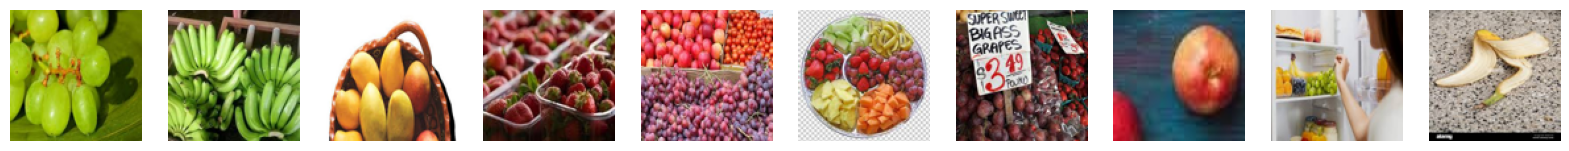

In [30]:
display_row(*take(10))

## Augmentation du jeu de données

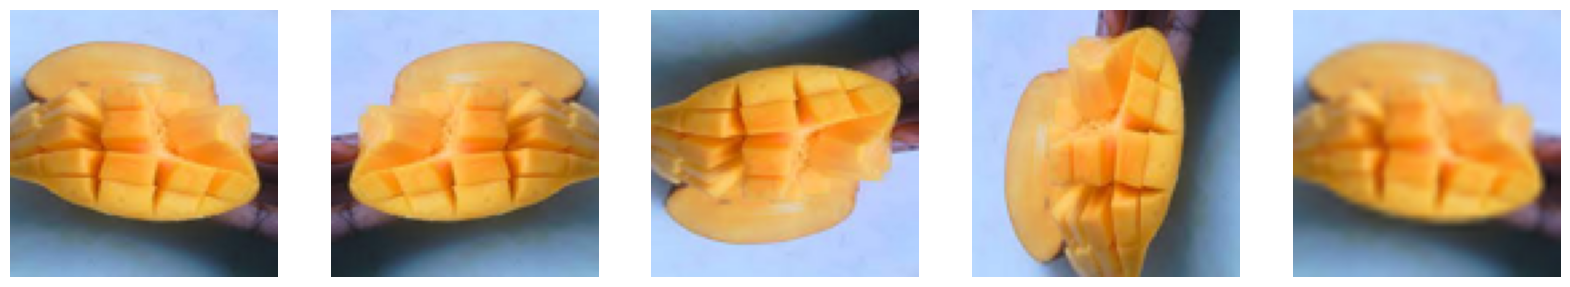

In [46]:

def variations(imgs):
    return sum([[img,
            img.transpose(Image.FLIP_LEFT_RIGHT),
            img.transpose(Image.FLIP_TOP_BOTTOM),
            img.transpose(Image.ROTATE_90),
            img.resize((50,40)).resize((100,100))]
            for img in imgs], [])

imgs = take(1)
display_row(*variations(imgs))

## Application de K-Means

In [81]:
def convert_to_trainable(imgs):
    return [np.array(img).astype(np.float64).flatten() / 255 for img in imgs]

def convert_to_visual(imgs):
    return [Image.fromarray(
            (img * 255)
                .astype(np.uint8)
                .reshape((100, 100, 3))
            ) for img in imgs]

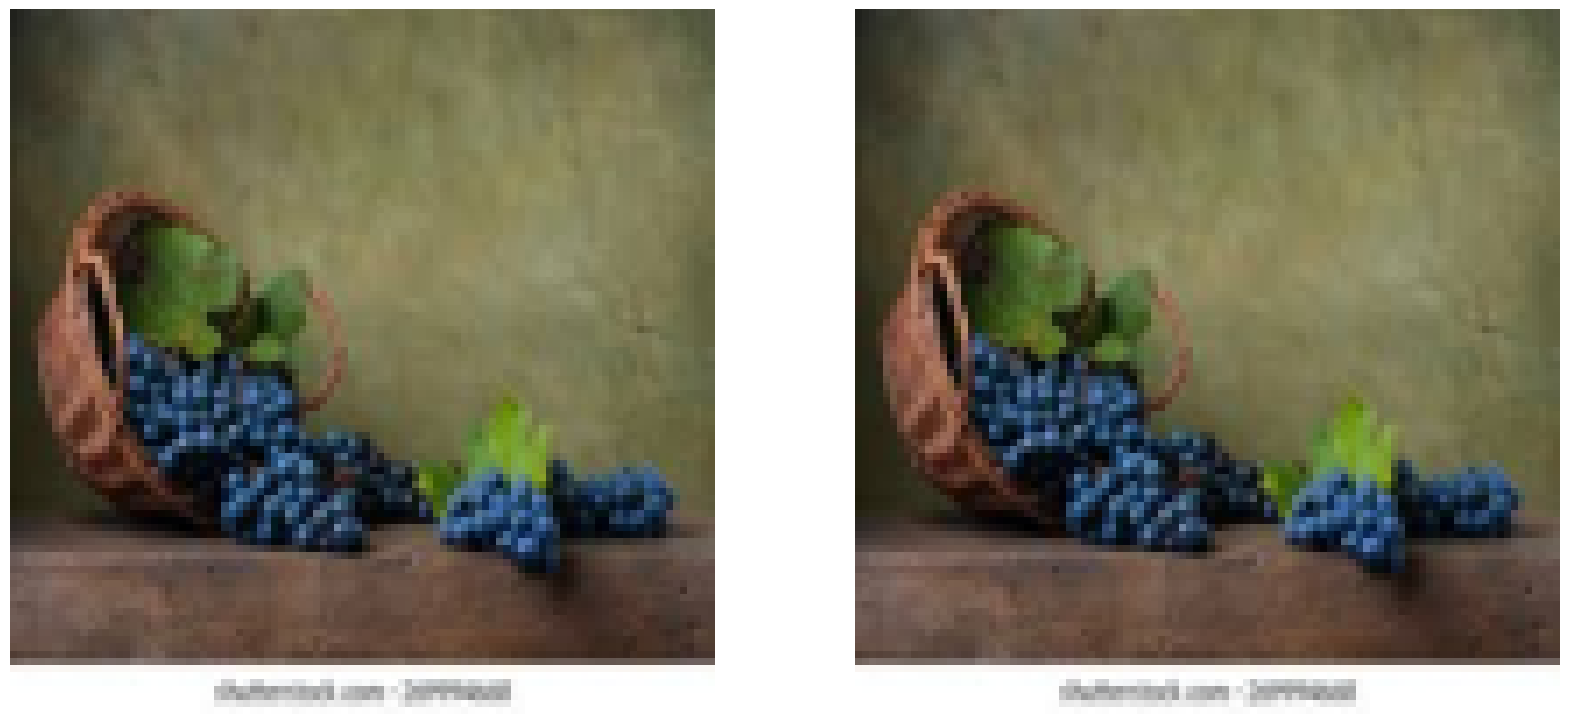

In [89]:
imgs = take(1)
t = convert_to_trainable(imgs)

i = convert_to_visual(t)
display_row(imgs[0], i[0])

In [90]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=4, random_state=42)
imgs = variations(take(100))
imgs = convert_to_trainable(imgs)
km.fit(imgs)

/home/sinux/.cache/pypoetry/virtualenvs/info905-tp3-NiO5J0R7-py3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=42)

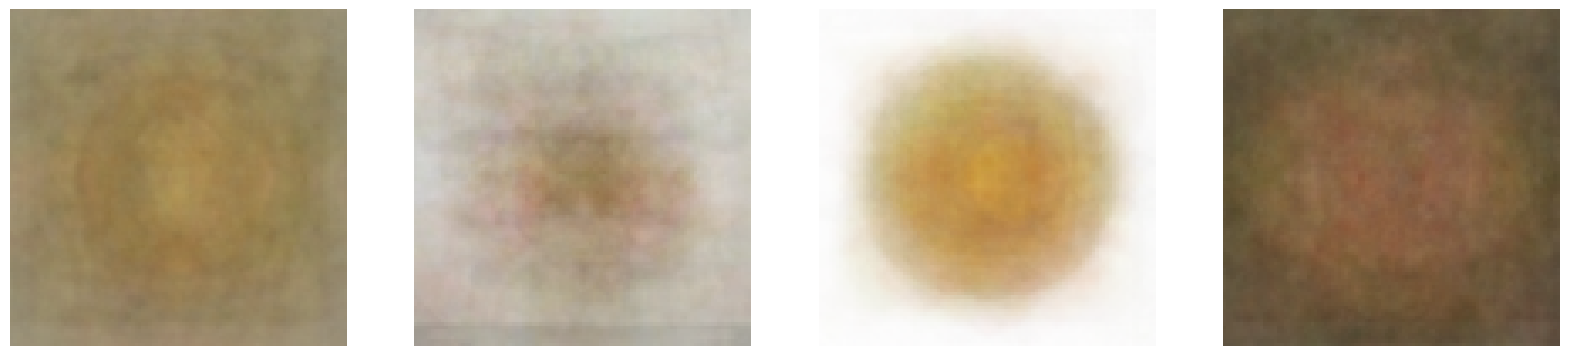